# 달리기 경주
## 1st try: list로 접근함

In [6]:
def solution(players, callings):

    for call in callings:
        for i in range(len(players)):
            if call == players[i]:
                players[i], players[i-1] = players[i-1], players[i]

    answer = players
        
    return answer

In [47]:
solution(["mumu", "soe", "poe", "kai", "mine"], ["kai", "kai", "mine", "mine"])

['mumu', 'soe', 'poe', 'kai', 'mine']

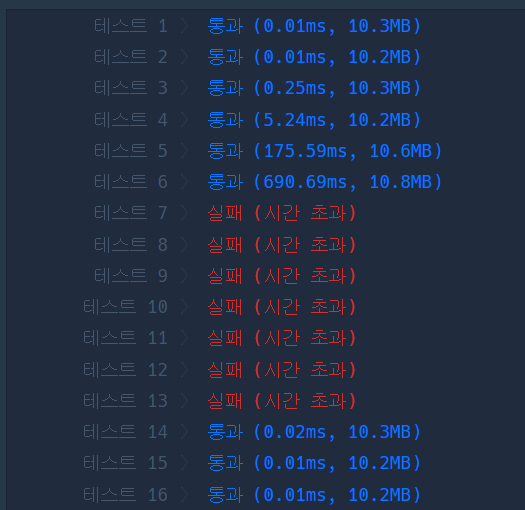    

시간 초과 분석: callings와 players는 list로, 탐색하는데에 각자 $O(n)$ 시간이 걸린다.   
자료구조를 바꾸지 않고 탐색 방법을 선형탐색에서 $O(logn)$ 시간이 걸리는 binary 탐색으로 바꿔본다.
## 2nd try: 탐색을 binary search로!

In [45]:
def solution(players, callings):
    for call in callings:
        i = binarySearch(players, call, 0, len(players)-1)
        players[i], players[i-1] = players[i-1], players[i]

    answer = players
    return answer

def binarySearch(arr, target, start, end):
    if start > end:
        return -1
    mid = (start + end) // 2

    if arr[mid] == target:
        return mid
    elif arr[mid] > target:
        return binarySearch(arr, target, start, mid-1)
    else:
        return binarySearch(arr, target, mid+1, end)

In [46]:
solution(["mumu", "soe", "poe", "kai", "mine"], ["kai", "kai", "mine", "mine"])

['mumu', 'soe', 'poe', 'kai', 'mine']

답이 안나와서 왜 안나왔는지 한참 고민해보다가 애초에 calling이 알파벳 순으로 정렬되어 있지 않기 때문에 binary search가 불가능하다는 것을 깨달았다.   
자료구조를 바꿔야겠다고 생각이 들었고 탐색을 빠르게 하는 direct access key나 hash table이 적합하다고 판단하였다.   
그 중에서도 메모리 공간을 효율적으로 활용하는 hash table을 사용하기로 하였다.   
Hash table은 탐색, 삽입, 정렬에 모두 $O(1)$ 시간이 걸리므로 문제를 해결할 수 있을 것이라고 생각했다.   
   
추가적으로 hash table은 key를 기준으로 하는 탐색에 O(1) 시간이 걸려서 빠르게 player로 찾을 수 있으나,    
value를 기준으로 탐색을 하고자하면 O(n) 시간이 걸리기 때문에 player:순서, 순서:player로    
딕셔너리를 두 개 만들어서 탐색을 하면 O(1)시간 걸리기 때문에 보다 더 효율적으로 문제를 풀 수 있다.   

## 3rd try: 자료구조를 dictionary로!

In [4]:
def solution(players, callings):
    # 시간 초과 걸렸기 때문에 hash table 사용
    playerIndex = {player:i for i, player in enumerate(players)}
    indexPlayer = {i:player for i, player in enumerate(players)}
    for call in callings:
        i = playerIndex[call]
        callTarget = indexPlayer[i-1]
        
        playerIndex[call] = i-1
        playerIndex[callTarget] = i
        
        indexPlayer[i-1] = call
        indexPlayer[i] = callTarget
        
    
    answer = list(indexPlayer.values())
    
    return answer